In [1]:
from medvae import MVAE
import torch
from nilearn.plotting import view_img
import numpy as np
import nibabel as nib

## Download Sample Data

In [2]:
import gdown

# Download some data to play with
DEFAULT_DATA_URL = '13dHwCtAt9ou9Ee8PcrzTAGE2WNoEc6SV?usp=share_link'

gdown.download_folder(id=DEFAULT_DATA_URL, output="data", quiet=True)

print(f'Data downloaded.')

Data downloaded.


## Example with 2D MedVAE (f=16; C=3)

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = MVAE(
    model_name='medvae_4_3_2d',
    modality='xray',
).to(device)
model.requires_grad_(False)
model.eval()

fpath = 'data/mmg_data/TQcBVJediTG8E34ftHnapA.png'

# Getting the transform and applying it
transform = model.get_transform()
img = transform(fpath).unsqueeze(0).to(device)

# Getting the latent representation
with torch.no_grad():
    latent = model(img).cpu().detach().numpy()

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


/data/akkumar/MedVAE/medvae/models/autoencoder_kl.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load(path, map_location="cpu")["state_dict"]


Restored from /home/akkumar/.cache/huggingface/hub/models--ashwinkumargb--MedVAE/snapshots/041f23d40d9890a3ee0cc1ee56e750e4b81acbe0/model_weights/vae_4x_3c_2D.ckpt with 0 missing and 0 unexpected keys


/data/akkumar/miniconda3/envs/compress/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:109: UserWarning: Threshold given was 1e-06, but the data has no values below -7.510313034057617. 
  warnings.warn(



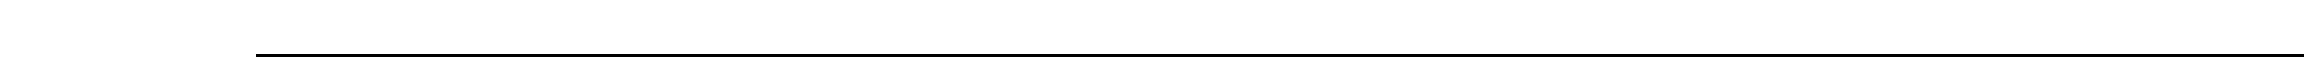
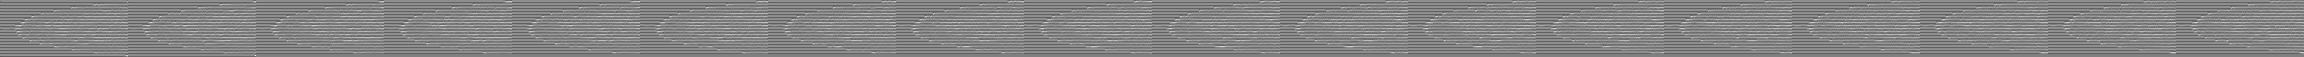

In [4]:
view_img(stat_map_img=nib.Nifti1Image(latent.transpose(1, 2, 0), np.eye(4)), bg_img=False, cmap='gray')

## CT Example with 3D MedVAE (f=16; C=1)

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = MVAE(
    model_name='medvae_4_1_3d',
    modality='CT',
).to(device)
model.requires_grad_(False)
model.eval()

fpath = 'data/ct_data/sino_7858_0398.nii.gz'

# Apply the model transform -- easiest way
img = model.apply_transform(fpath).to(device)

# Getting the latent representation
with torch.no_grad():
    latent = model(img).cpu().detach().numpy()

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 1, 128, 128) = 16384 dimensions.
making attention of type 'vanilla' with 512 in_channels


/data/akkumar/MedVAE/medvae/models/autoencoder_kl_3d.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load(path, map_location="cpu")["state_dict"]


Restored from /home/akkumar/.cache/huggingface/hub/models--ashwinkumargb--MedVAE/snapshots/041f23d40d9890a3ee0cc1ee56e750e4b81acbe0/model_weights/vae_4x_1c_3D.ckpt with 0 missing and 0 unexpected keys


/data/akkumar/miniconda3/envs/compress/lib/python3.10/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.array CropForeground.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


/data/akkumar/miniconda3/envs/compress/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:109: UserWarning: Threshold given was 1e-06, but the data has no values below -56.69289016723633. 
  warnings.warn(



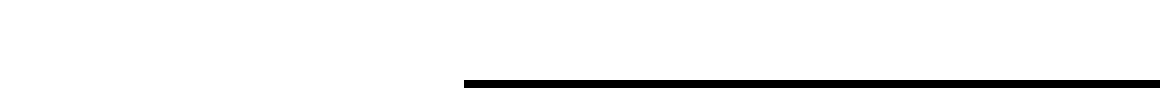
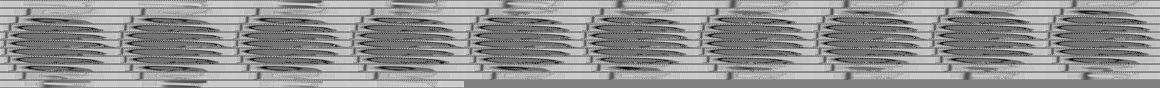

In [6]:
view_img(stat_map_img=nib.Nifti1Image(latent, np.eye(4)), bg_img=False, cmap='gray')


## MRI Example with 3D MedVAE (f=16; C=1)

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = MVAE(
    model_name='medvae_4_1_3d',
    modality='MRI',
).to(device)
model.requires_grad_(False)
model.eval()

fpath = 'data/mri_data/t1oasis_case_1286.nii.gz'

# Apply the model transform -- easiest way
img = model.apply_transform(fpath).to(device)

# Getting the latent representation
with torch.no_grad():
    latent = model(img).cpu().detach().numpy()

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 1, 128, 128) = 16384 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from /home/akkumar/.cache/huggingface/hub/models--ashwinkumargb--MedVAE/snapshots/041f23d40d9890a3ee0cc1ee56e750e4b81acbe0/model_weights/vae_4x_1c_3D.ckpt with 0 missing and 0 unexpected keys


/data/akkumar/miniconda3/envs/compress/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:109: UserWarning: Threshold given was 1e-06, but the data has no values below -31.877748489379883. 
  warnings.warn(



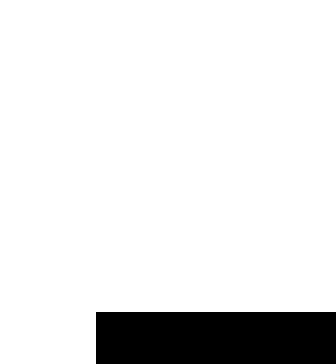
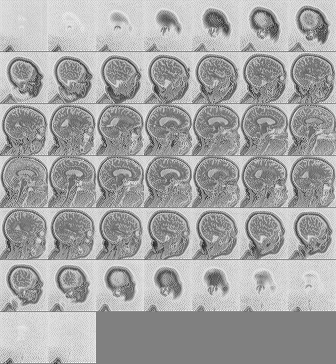

In [8]:
# 2D Demo example
view_img(stat_map_img=nib.Nifti1Image(latent, np.eye(4)), bg_img=False, cmap='gray')